pre-process the data set so that you only have one subnetwork data. <br>
• flow-continue: output generated with crl_flow tool using 60 second
timeout to expire ﬂow. Time intervals are aligned as one hour. <br>
• flow-expire: same as above, but all ﬂows are expired when reporting
period (one hour) ends. <br>
• tstat-log: output generated with tstat tool. <br>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import csv
import os
import random

### Data pre-processing
You do not need to analyse the whole data set FS1 (except in task 2.3) <br>
extract relevant data(FS2) using gawk command  <br>
seeks all the rows that have IP-address pattern of “192.0.2.”  in 1st column or 2nd column from the ﬁle 1200.t2. <br>
gawk ‘$1~/^192\.0\.2\./||$2~/^192\.0\.2\./’ 1200.t2 > ~/my_1200.t2 <br>
In tstat-log ﬁles, IP addresses are in 1st and 15th ﬁelds. <br>


### extracting 133.60.172.0/24 subnet from whole dataset, then convert to csv
t2->csv

In [2]:
def extract_subnet_csv(t2_name, subnet, csv_name):
    extract_lst = []
    with open(t2_name , 'r') as f1:
        for line in f1:
            line = line.strip()
            if line.startswith("#") or len(line) == 0:
                pass
            else:
                if subnet in line:
                    x = line.split('\t')
                    extract_lst.append(x)

    header = ['src', 'dst', 'pro', 'ok', 'sport', 'dport', 'pkts', 'bytes',
    'flows', 'first', 'latest']

    with open(csv_name, 'w', newline='') as f2:
        out = csv.writer(f2)
        out.writerow(header)
        out.writerows(extract_lst)


In [20]:
# flow-continue
root = 'G:/dataset/flow-continue/'
dstroot = './t2_extract/flow-continue/'
for filename in os.listdir(root):
    new_name = ''.join(filename.split('.t2'))+'.csv'
    # print(new_name)
    extract_subnet_csv(os.path.join(root,filename),'133.60.172.',os.path.join(dstroot,new_name))


In [3]:
# flow-expire
root = 'G:/dataset/flow-expire/'
dstroot = './t2_extract/flow-expire/'
for filename in os.listdir(root):
    new_name = ''.join(filename.split('.t2'))+'.csv'
    extract_subnet_csv(os.path.join(root,filename),'133.60.172.',os.path.join(dstroot,new_name))

### Data analysis
2.1 Select one of the previous tasks (1.4-1.5, 1.7-1.9) and perform the same analysis for the FS2 data set. <br>
2.2 Compute the aggregate data volume for each user and draw a histogram to visualise distribution of user aggregated data no need to identify users from each other. (user would be one IP address within your assigned subnetwork)  <br>
2.3 use FS1 and take ALL ﬂow data into account (i.e., not limiting the scope solely on your subnetwork).
two random selections->1. only include IPv4.  2. only IPv6  <br>

In [18]:
# concatenating all csv file into one data frame
df_fs2 = pd.read_csv("./t2_extract/flow-continue/15-2-1800.csv")
root = './t2_extract/flow-continue/'
dstroot = './t2_extract/flow-continue/'
for filename in os.listdir(root):
    if filename != "15-2-1800.csv":
        part = pd.read_csv("./t2_extract/flow-continue/" + filename)
        df_fs2 = pd.concat([df_fs2,part])



Text(0, 0.5, 'frequency')

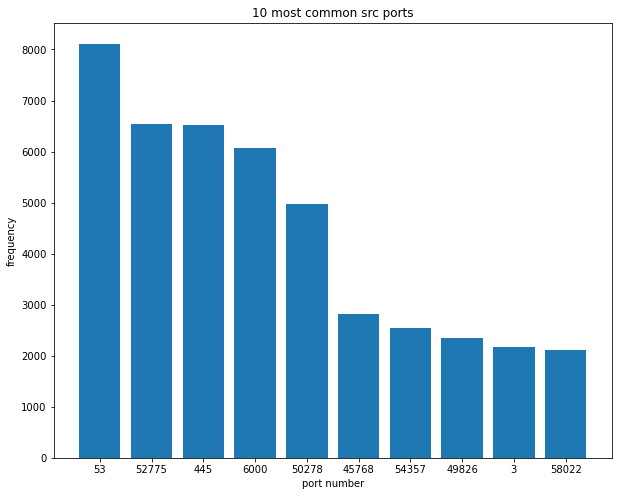

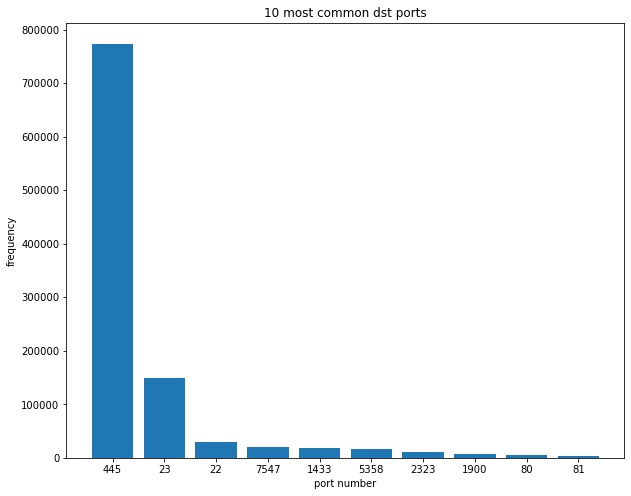

In [19]:
# 2.1
# choose task 1.4
# visualize flow distribution by port

src_ports = df_fs2.loc[:,'sport']
dst_ports = df_fs2.loc[:,'dport']

plt.figure(figsize=(10,8))
src_ports.plot.hist(bins=200)
plt.title("flow distribtion by source port")
plt.xlabel("port number")
plt.ylabel("flows")

plt.figure(figsize=(10,8))
dst_ports.plot.hist(bins=200)
plt.title("flow distribtion by dst port")
plt.xlabel("port number")
plt.ylabel("flows")

ports = src_ports.value_counts().index.tolist()
freqs = src_ports.value_counts().values.tolist()
N_most_common = 10
mc_ports = [str(x) for x in ports[0:N_most_common]]
mc_freqs = freqs[0:N_most_common]
plt.figure(figsize=(10,8))
plt.bar(mc_ports, mc_freqs)
plt.title(str(N_most_common)+" most common src ports")
plt.xlabel("port number")
plt.ylabel("frequency")

ports = dst_ports.value_counts().index.tolist()
freqs = dst_ports.value_counts().values.tolist()
N_most_common = 10
mc_ports = [str(x) for x in ports[0:N_most_common]]
mc_freqs = freqs[0:N_most_common]
plt.figure(figsize=(10,8))
plt.bar(mc_ports, mc_freqs)
plt.title(str(N_most_common)+" most common dst ports")
plt.xlabel("port number")
plt.ylabel("frequency")


Text(0, 0.5, 'Traffic Volume[bytes]')

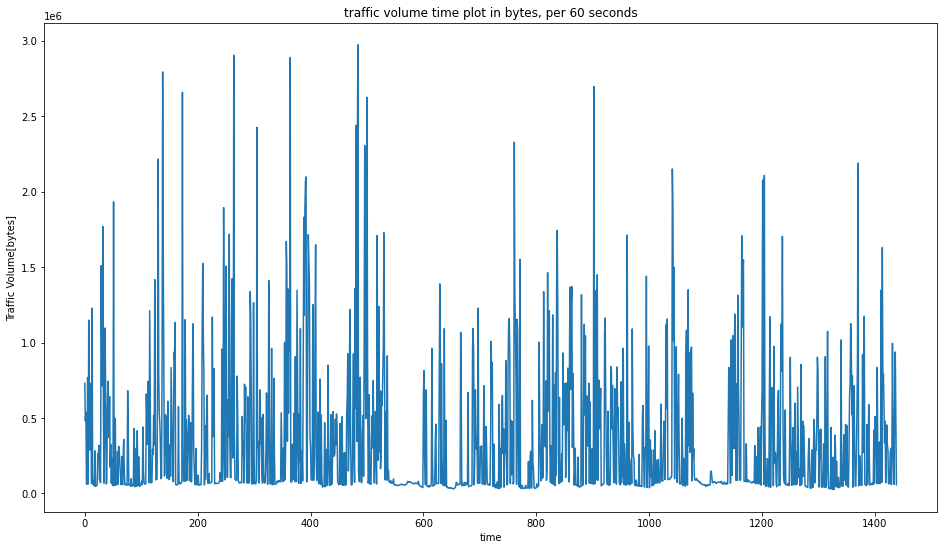

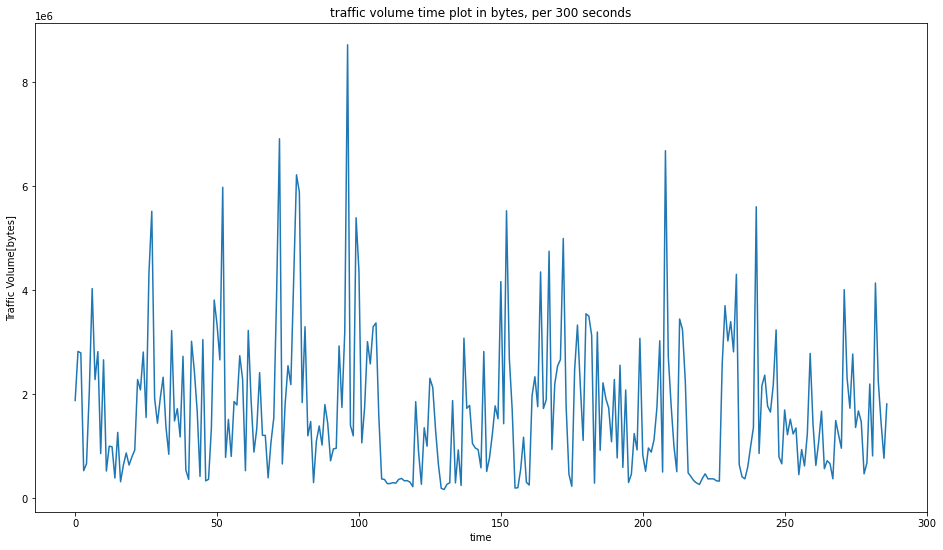

In [8]:
# 2.1
# choose task 1.5
df_fs2 = df_fs2.sort_values("first")

init_time = float(df_fs2.loc[:,'first'].min())
time_scale_1 = 60
time_scale_2 = 300

volumes_list = []
cur_period = 0
period_i = 0
for index, row in df_fs2.iterrows():
    time = float(row['first'])
    if time-init_time >= period_i*time_scale_1 and time-init_time <= (period_i+1)*time_scale_1:
        cur_period += int(row['bytes'])
    else:
        volumes_list.append(cur_period)
        cur_period = 0
        period_i += 1

plt.figure(figsize=(16,9))
plt.plot(np.array(volumes_list))
plt.title("traffic volume time plot in bytes, per "+str(time_scale_1)+" seconds")
plt.xlabel("time")
plt.ylabel("Traffic Volume[bytes]")

volumes_list = []
cur_period = 0
period_i = 0
for index, row in df_fs2.iterrows():
    time = float(row['first'])
    if time-init_time >= period_i*time_scale_2 and time-init_time <= (period_i+1)*time_scale_2:
        cur_period += int(row['bytes'])
    else:
        volumes_list.append(cur_period)
        cur_period = 0
        period_i += 1

plt.figure(figsize=(16,9))
plt.plot(np.array(volumes_list))
plt.title("traffic volume time plot in bytes, per "+str(time_scale_2)+" seconds")
plt.xlabel("time")
plt.ylabel("Traffic Volume[bytes]")

In [3]:
# 2.2
my_subnet = '133.60.172.'
volume_series = pd.Series(np.zeros((256)))
for index, row in df_fs2.iterrows():
    if my_subnet in row['src']:
        user_index = int(row['src'].split('.')[-1])
        volume_series[user_index] += int(row['bytes'])
    else:
        user_index = int(row['dst'].split('.')[-1])
        volume_series[user_index] += int(row['bytes'])
    

Text(0, 0.5, 'volume[bytes]')

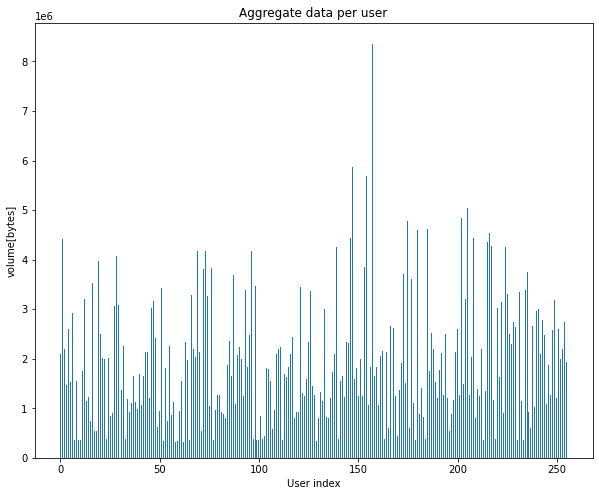

In [4]:
x = volume_series.index.values
y = volume_series.values
plt.figure(figsize=(10,8))
plt.bar(x,y,width=0.5)
plt.title("Aggregate data per user")
plt.xlabel("User index")
plt.ylabel("volume[bytes]")

Text(0, 0.5, 'frequency')

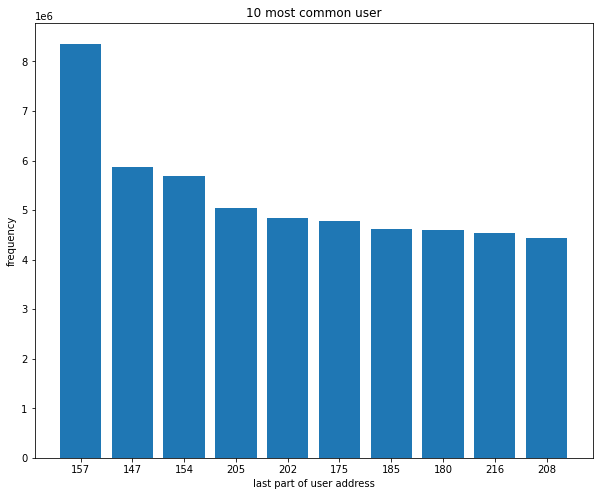

In [17]:
# bar plot for most common
volume_series = volume_series.sort_values(ascending=False)
index = volume_series.index[0:10]
values = volume_series.values[0:10]
index_1 = [str(x) for x in index.tolist()]
plt.figure(figsize=(10,8))
plt.bar(index_1, values)
plt.title("10 most common user")
plt.xlabel("last part of user address")
plt.ylabel("frequency")




2.3

In [8]:
# get the total number of ipv4 and ipv6 in each file
names = []
ipv4_number = []
ipv6_number = []
root = 'G:/dataset/flow-continue/'
for filename in os.listdir(root):
    with open(os.path.join(root, filename) , 'r') as f:
        ipv4_count = 0
        ipv6_count = 0
        for line in f:
            if '#' not in line:
                part = line.split('\t')[0]
                if ':' in part:
                    ipv6_count += 1
                if '.' in part:
                    ipv4_count += 1
        names.append(filename)
        ipv4_number.append(ipv4_count)
        ipv6_number.append(ipv6_count)
# save result to csv
f = open('t2_count.csv','w', newline='')
with f:
    write = csv.writer(f)
    write.writerows([names, ipv4_number, ipv6_number])

In [23]:
def sample_from_file_ipv4(filename, index_list):
    with open("G:/dataset/flow-continue/"+str(filename) , 'r') as f:
        samples_from_this_file = []
        cur_index = 0
        for line in f:
            if '#' not in line:
                part = line.split('\t')[0]
                if '.' in part:
                    cur_index += 1
                if cur_index in index_list:
                    samples_from_this_file.append(line.split('\t'))
                    
    return samples_from_this_file
    
        

In [2]:
# 2.3
# select from all t2 files randomly
# subnetwork size
subnet_total = 0
for filename in os.listdir("./t2_extract/flow-continue/"):
    df = pd.read_csv("./t2_extract/flow-continue/"+filename)
    subnet_total += df.shape[0]


df = pd.read_csv("t2_count.csv",header=None)
display(df)
# analysis



,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,15-2-1800.t2,15-2-1900.t2,15-2-2000.t2,15-2-2100.t2,15-2-2200.t2,15-2-2300.t2,15-3-0000.t2,15-3-0100.t2,15-3-0200.t2,15-3-0300.t2,...,15-3-1000.t2,15-3-1100.t2,15-3-1200.t2,15-3-1300.t2,15-3-1400.t2,15-3-1500.t2,15-3-1600.t2,15-3-1700.t2,15-3-1800.t2,15-3-1800.t2.25
1,94756413,97481240,96807359,95991461,97708650,95618948,96240550,96392205,96693770,97244199,...,98827618,97374771,96023901,95814425,96740289,94843609,97049166,96682813,52,1630799
2,566931,734673,736111,600369,564928,519991,510884,549226,600282,750426,...,901345,884726,771258,716739,671192,625204,612759,618774,0,11779


In [4]:
s = pd.to_numeric( df.iloc[2,:])
s.sum()

17490978

In [9]:
# total ipv3
df = pd.read_csv("t2_count.csv",header=None)
s = df.loc[1,:].tolist()
s1 = [int(x) for x in s]
print(sum(s1))

2325854078
